## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [2]:
# Your code here - remember to use markdown cells for comments as well!

# Studio Analysis

### Authored by: Mandela Odhiambo

#### Student Pace: Full Time

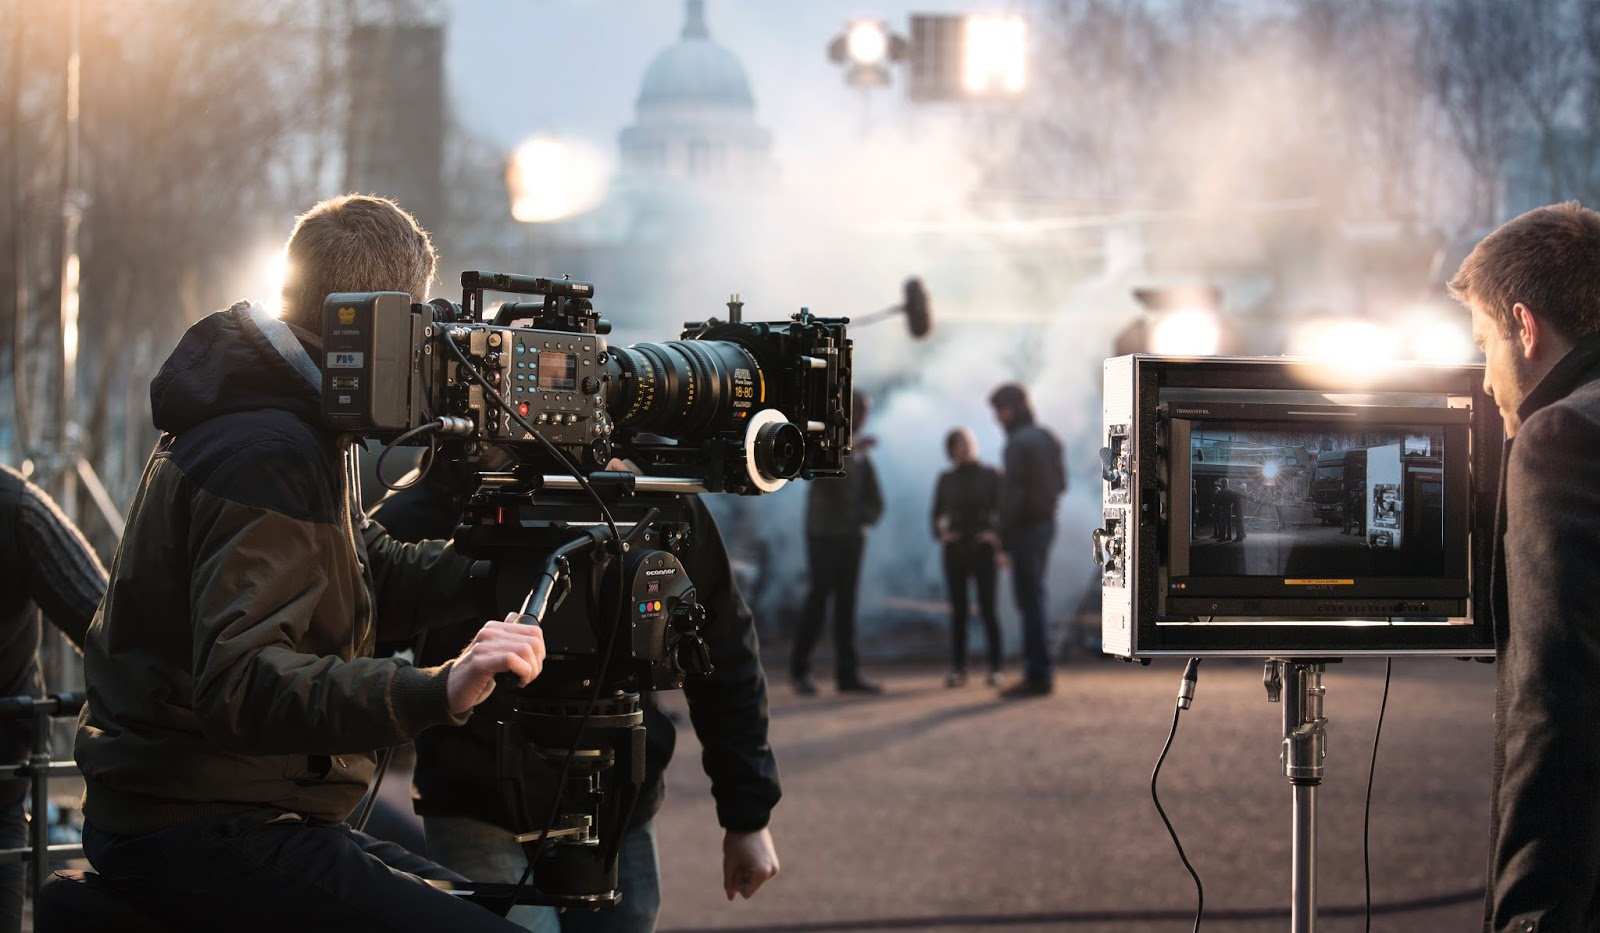

### Project Overview

### Business Understanding

### Data Understanding

### Data Analysis

### Recommendations

### Next Steps

In [3]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('tmdb.movies.csv', index_col='Unnamed: 0')

In [5]:
new_df = pd.read_csv('bom.movie_gross.csv')

In [6]:
new_df2 = pd.read_csv('tn.movie_budgets.csv', index_col=0)

In [7]:
#Creating a connection to the DB

conn = sqlite3.connect('im.db')

In [8]:
#Reading from the DB

movie_ratings = pd.read_sql("""
        SELECT * 
            FROM movie_ratings;
""", conn)
movie_ratings.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [9]:
movie_basics = pd.read_sql("""
        SELECT * 
            FROM movie_basics;
""", conn)
movie_basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


#### Joining Movie_Basics and Movie_Ratings

In [11]:
df4 = pd.read_sql("""
        SELECT primary_title, start_year, genres, averagerating, numvotes
            FROM movie_basics AS MB
            JOIN movie_ratings AS MR
                ON MB.movie_id = MR.movie_id
            WHERE numvotes > 800000 AND averagerating BETWEEN 7 AND 9
            ORDER BY numvotes DESC;
""", conn)

df4

,primary_title,start_year,genres,averagerating,numvotes
0,Inception,2010,"Action,Adventure,Sci-Fi",8.8,1841066
1,The Dark Knight Rises,2012,"Action,Thriller",8.4,1387769
2,Interstellar,2014,"Adventure,Drama,Sci-Fi",8.6,1299334
3,Django Unchained,2012,"Drama,Western",8.4,1211405
4,The Avengers,2012,"Action,Adventure,Sci-Fi",8.1,1183655
5,The Wolf of Wall Street,2013,"Biography,Crime,Drama",8.2,1035358
6,Shutter Island,2010,"Mystery,Thriller",8.1,1005960
7,Guardians of the Galaxy,2014,"Action,Adventure,Comedy",8.1,948394
8,Deadpool,2016,"Action,Adventure,Comedy",8.0,820847


In [12]:
df4.dtypes

primary_title     object
start_year         int64
genres            object
averagerating    float64
numvotes           int64
dtype: object

In [13]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   primary_title  9 non-null      object 
 1   start_year     9 non-null      int64  
 2   genres         9 non-null      object 
 3   averagerating  9 non-null      float64
 4   numvotes       9 non-null      int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 488.0+ bytes


In [14]:
df.genre_ids.value_counts()

[99]                      3700
[]                        2479
[18]                      2268
[35]                      1660
[27]                      1145
                          ... 
[27, 878, 99]                1
[18, 28, 53, 80, 9648]       1
[14, 10751, 12]              1
[16, 28, 35, 878]            1
[99, 18, 10749]              1
Name: genre_ids, Length: 2477, dtype: int64

In [15]:
#Getting the best directors and their ratings

directors_query = """
        SELECT primary_name, COUNT(primary_name) AS Appearance, AVG(averagerating) AVG_R
            FROM persons p 
            JOIN directors d 
                ON p.person_id = d.person_id
            JOIN movie_basics mb 
                ON d.movie_id = mb.movie_id 
            JOIN movie_ratings mr 
                ON mb.movie_id = mr.movie_id
            GROUP BY primary_name
            HAVING AVG_R > 8
            ORDER BY Appearance DESC;
"""

directors = pd.read_sql(directors_query, conn)
directors.head(10)

,primary_name,Appearance,AVG_R
0,Joe Russo,31,8.180645
1,Anthony Russo,30,8.246667
2,Sylvia Broeckx,28,9.000000
3,Erin Korbylo,28,9.000000
4,Dennis Korbylo,28,9.000000
5,Pauli Janhunen Calderón,23,8.152174
6,Lisa Gossels,17,9.000000
7,Jaco Van Dormael,16,8.106250
8,Peter Mortimer,14,8.221429
9,Josh Lowell,14,8.221429


In [16]:
movie_basics

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [17]:
directors.primary_name.value_counts().head(10)

Byron Love Luv            1
Lieven Corthouts          1
Moritz Richard Schmidt    1
Alexander Reid            1
Mark McLaughlin           1
Sally Rubin               1
Jonathan Sequeira         1
Reuben Johnson            1
Andrew Young              1
Simon Lee                 1
Name: primary_name, dtype: int64

In [18]:
#Checking for Null Values and Duplicates

directors.isnull().sum()

primary_name    0
Appearance      0
AVG_R           0
dtype: int64

In [19]:
directors.duplicated().value_counts()

False    6813
dtype: int64

In [20]:
#Grouping Directors Against their Average Rating

grouping_directors = directors.groupby('primary_name')['averagerating'].mean()
grouping_directors.sort_values(ascending=False).head(10)

KeyError: 'Column not found: averagerating'

In [21]:
#Finding the Directors Behind the Highest Grossing Films

new_df2

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...
78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"


In [22]:
new_df2.isna().sum()

release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [23]:
new_df2.duplicated().value_counts()

False    5782
dtype: int64

In [24]:
new_df2.dtypes

release_date         object
movie                object
production_budget    object
domestic_gross       object
worldwide_gross      object
dtype: object

In [25]:
#Removing Unwanted Characters

def remove_unwanted(df, characters_to_remove):
    """Function to remove unwanted characters from the columns"""
    
    
    for col in df.columns:
        df[col] = df[col].apply(lambda x: ''.join([b for b in x if b not in characters_to_remove]))
        
    return df

In [26]:
new_df2 = remove_unwanted(new_df2, ['$', ','])
new_df2

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,Dec 18 2009,Avatar,425000000,760507625,2776345279
2,May 20 2011,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
3,Jun 7 2019,Dark Phoenix,350000000,42762350,149762350
4,May 1 2015,Avengers: Age of Ultron,330600000,459005868,1403013963
5,Dec 15 2017,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...
78,Dec 31 2018,Red 11,7000,0,0
79,Apr 2 1999,Following,6000,48482,240495
80,Jul 13 2005,Return to the Land of Wonders,5000,1338,1338


In [27]:
#Dropping the release_date column

new_df2.drop('release_date', axis=1, inplace=True)
new_df2

,movie,production_budget,domestic_gross,worldwide_gross
id,,,,
1,Avatar,425000000,760507625,2776345279
2,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
3,Dark Phoenix,350000000,42762350,149762350
4,Avengers: Age of Ultron,330600000,459005868,1403013963
5,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...
78,Red 11,7000,0,0
79,Following,6000,48482,240495
80,Return to the Land of Wonders,5000,1338,1338


In [28]:
#Converting the production_budget, domestic_gross, and worldwide_gross columns to float

new_df2[['production_budget', 'domestic_gross', 'worldwide_gross']] = new_df2[['production_budget', 'domestic_gross', 'worldwide_gross']].astype(float)
new_df2

,movie,production_budget,domestic_gross,worldwide_gross
id,,,,
1,Avatar,425000000.0,760507625.0,2.776345e+09
2,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
3,Dark Phoenix,350000000.0,42762350.0,1.497624e+08
4,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
5,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09
...,...,...,...,...
78,Red 11,7000.0,0.0,0.000000e+00
79,Following,6000.0,48482.0,2.404950e+05
80,Return to the Land of Wonders,5000.0,1338.0,1.338000e+03


In [29]:
#Adding a new column to track returns from every movie

new_df2['returns'] = new_df2['worldwide_gross'] - new_df2['production_budget']

In [30]:
#Adding a new column to track returns from every movie

new_df2['Movie_ROI'] = round((new_df2['worldwide_gross'] - new_df2['production_budget']) / new_df2['production_budget'], 2)
new_df2

,movie,production_budget,domestic_gross,worldwide_gross,returns,Movie_ROI
id,,,,,,
1,Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09,5.53
2,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,6.350639e+08,1.55
3,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-2.002376e+08,-0.57
4,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.072414e+09,3.24
5,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,9.997217e+08,3.15
...,...,...,...,...,...,...
78,Red 11,7000.0,0.0,0.000000e+00,-7.000000e+03,-1.00
79,Following,6000.0,48482.0,2.404950e+05,2.344950e+05,39.08
80,Return to the Land of Wonders,5000.0,1338.0,1.338000e+03,-3.662000e+03,-0.73


In [31]:
#Getting the top 10 Highest Grossing Films

highest_grossing_films = new_df2.sort_values('returns', ascending = False)
highest_grossing_films.head(10)

,movie,production_budget,domestic_gross,worldwide_gross,returns,Movie_ROI
id,,,,,,
1,Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09,5.53
43,Titanic,200000000.0,659363944.0,2.208208e+09,2.008208e+09,10.04
7,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,1.748134e+09,5.83
6,Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09,1.747311e+09,5.71
34,Jurassic World,215000000.0,652270625.0,1.648855e+09,1.433855e+09,6.67
67,Furious 7,190000000.0,353007020.0,1.518723e+09,1.328723e+09,6.99
27,The Avengers,225000000.0,623279547.0,1.517936e+09,1.292936e+09,5.75
61,Harry Potter and the Deathly Hallows: Part II,125000000.0,381193157.0,1.341693e+09,1.216693e+09,9.73
42,Black Panther,200000000.0,700059566.0,1.348258e+09,1.148258e+09,5.74


In [32]:
#Grouping to Plot

grouping_movies = highest_grossing_films.set_index('movie')
grouped_movies = grouping_movies.head(10)
grouped_movies

,production_budget,domestic_gross,worldwide_gross,returns,Movie_ROI
movie,,,,,
Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09,5.53
Titanic,200000000.0,659363944.0,2.208208e+09,2.008208e+09,10.04
Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,1.748134e+09,5.83
Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09,1.747311e+09,5.71
Jurassic World,215000000.0,652270625.0,1.648855e+09,1.433855e+09,6.67
Furious 7,190000000.0,353007020.0,1.518723e+09,1.328723e+09,6.99
The Avengers,225000000.0,623279547.0,1.517936e+09,1.292936e+09,5.75
Harry Potter and the Deathly Hallows: Part II,125000000.0,381193157.0,1.341693e+09,1.216693e+09,9.73
Black Panther,200000000.0,700059566.0,1.348258e+09,1.148258e+09,5.74


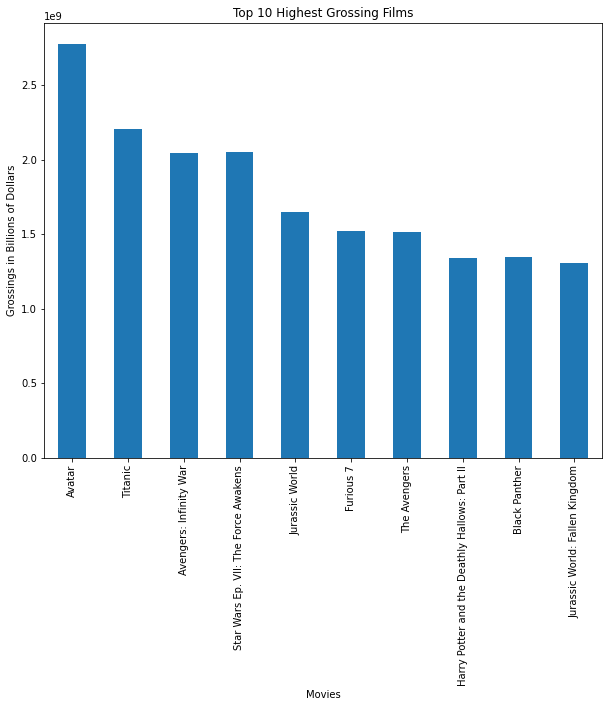

In [33]:
#Plotting

plt.figure(figsize = (10, 8))

grouped_movies['worldwide_gross'].plot(kind='bar')
plt.title('Top 10 Highest Grossing Films')
plt.xlabel('Movies')
plt.ylabel('Grossings in Billions of Dollars')
plt.show();

In [34]:
#Retrieving the Movies with the Highest ROI
#Plotted from Number 2: The First Value was an Outlier

movies_with_highest_ROI = new_df2.sort_values('Movie_ROI', ascending = False).head(10).iloc[1:]
movies_with_highest_ROI

,movie,production_budget,domestic_gross,worldwide_gross,returns,Movie_ROI
id,,,,,,
14,Mad Max,200000.0,8750000.0,99750000.0,99550000.0,497.75
93,Paranormal Activity,450000.0,107918810.0,194183034.0,193733034.0,430.52
80,The Gallows,100000.0,22764410.0,41656474.0,41556474.0,415.56
7,The Blair Witch Project,600000.0,140539099.0,248300000.0,247700000.0,412.83
10,Super Size Me,65000.0,11529368.0,22233808.0,22168808.0,341.06
47,Bambi,858000.0,102797000.0,268000000.0,267142000.0,311.35
74,El Mariachi,7000.0,2040920.0,2041928.0,2034928.0,290.70
77,Night of the Living Dead,114000.0,12087064.0,30087064.0,29973064.0,262.92
11,Rocky,1000000.0,117235147.0,225000000.0,224000000.0,224.00


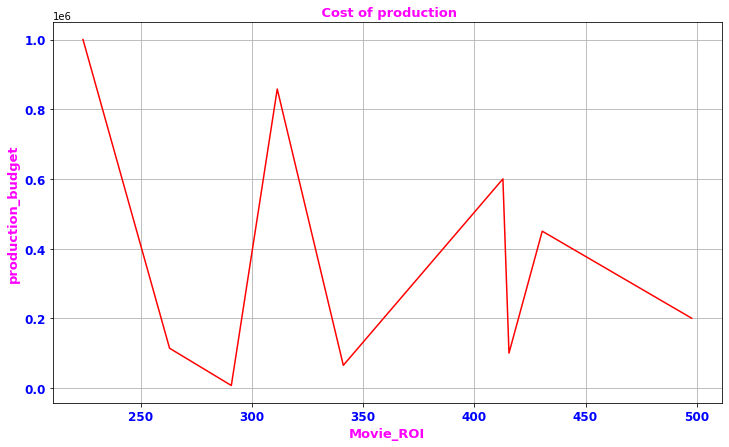

In [35]:
#Visualizing the top ten highest grossing films

plt.figure(figsize= (12, 7))

sns.lineplot(x='Movie_ROI',y='production_budget', data=movies_with_highest_ROI, color = 'red')

plt.xlabel('Movie_ROI',  fontsize = 13, fontweight = 'bold', color = 'magenta')
plt.ylabel('production_budget', fontsize = 13, fontweight = 'bold', color = 'magenta')
plt.title(' Cost of production',  fontsize = 13, fontweight = 'bold', color = 'magenta')
plt.xticks( fontsize = 12, fontweight = 'bold', color = 'blue')
plt.yticks( fontsize = 12, fontweight = 'bold', color = 'blue')
plt.grid();